# Tutorial: How to use ExTrack


In [1]:
import extrack
import numpy as np
from matplotlib import pyplot as plt
import os

version: 1.4


In order to simulate tracks able to come and leave from the field of view, One can use the following function:

extrack.simulate_tracks.sim_FOV
inputs:
- nb_tracks: number of tracks simulated.
- max_track_len: number of steps simulated per track.
- LocErr: standard deviation of the localization error.
- Ds: 1D array of the diffusion coefs for each state.
- TrMat: transition array per step (lines: state at time n, cols: states at time n+1).
- dt: time in between frames.
- pBL: probability of bleaching per step.
- cell_dims: dimension limits in x, y and z respectively. x, y dimension limits are useful when tracking membrane proteins in tirf when the particles leave the field of view from the sides of the cells. z dimension is relevant for cytoplasmic proteins which can leave from the z axis. Consider the particle can leave from both ends of each axis: multiply axis limit by 2 to aproximate tracks leaving from one end.
- min_len: minimal track length for the track to be considered.

outputs:
- all_tracks: dict describing the tracks with track length as keys (number of time positions, e.g. '23') of 3D arrays: dim 0 = track, dim 1 = time position, dim 2 = x, y position.
- all_Bs: dict descibing the true states of tracks with track length as keys (number of time positions, e.g. '23') of 3D arrays: dim 0 = track, dim 1 = time position, dim 2 = x, y position.

In [46]:
dt = 0.02

# extrack.simulate_tracks.sim_FOV allows to simulate tracks able to leave the field of view

all_tracks, all_Bs = extrack.simulate_tracks.sim_FOV(nb_tracks=20000,#increase this number to simulate more tracks and gain in precision
                                                     max_track_len=60,
                                                     LocErr=0.02,
                                                     Ds = np.array([0,0.25]),
                                                     initial_fractions = np.array([0.6,0.4]),
                                                     TrMat = np.array([[0.9,0.1],[0.1,0.9]]),
                                                     dt = dt,
                                                     pBL = 0.05,
                                                     cell_dims = [1,None,None],
                                                     min_len = 21)

number of tracks:
21 pos : 421, 22 pos : 412, 23 pos : 381, 24 pos : 356, 25 pos : 331, 26 pos : 302, 27 pos : 275, 28 pos : 261, 29 pos : 264, 30 pos : 248, 31 pos : 199, 32 pos : 199, 33 pos : 172, 34 pos : 158, 35 pos : 148, 36 pos : 156, 37 pos : 124, 38 pos : 119, 39 pos : 103, 40 pos : 94, 41 pos : 104, 42 pos : 84, 43 pos : 83, 44 pos : 85, 45 pos : 83, 46 pos : 72, 47 pos : 73, 48 pos : 49, 49 pos : 51, 50 pos : 51, 51 pos : 45, 52 pos : 33, 53 pos : 57, 54 pos : 34, 55 pos : 35, 56 pos : 37, 57 pos : 25, 58 pos : 36, 59 pos : 23, 60 pos : 294, 

One can also load tracks from actual experiments. If files are saved from trackmate using the trackmate xml format load tracks with the function extrack.readers.read_trackmate_xml

arguments:
- path: path to the data in the trackmate xml format.
- lengths: track lengths considered (default value = np.arange(5,16)).
- dist_th: maximal distance between consecutive time points (default value = 0.3).
- start_frame: first frame to consider (default value = 0).
- remove_no_disp: If True, removes tracks that show absolutly no displacements as most likely arising from wrong peak detection.
- opt_metrics_names: otional values to keep track of (default value = [], can be ['pred_0', 'pred_1'] for instance),
- opt_metrics_types: type of the optional values (default value = None, will assume 'float64' type if None).

the function extrack.readers.read_table can be used if files are saved as pickle format or csv, table format.  where each line represents a peak, and each column a propertie of peaks, this requires to specify at least the x and y positions, the frame number and the track ID for each peak.

arguments:
- path: path to the data in the trackmate xml format.
- lengths: track lengths considered (default value = np.arange(5,16)).
- dist_th: maximal distance between consecutive time points (default value = 0.3).
- start_frame: first frame to consider (default value = 0).
- fmt: format of the document to be red, can be 'csv' or 'pkl'. One can also simply specify a separator in case of another table format, e.g. ';' if colums are separated by ';'.
- colnames: list of the header names  corresponding to x and y positions as well as the frame and track ID for each peak. (default value = ['POSITION_X', 'POSITION_Y', 'FRAME', 'TRACK_ID']).
- opt_colnames: List of additional metrics to collect from the file, e.g. ['QUALITY', 'ID'],(default value = []).
- remove_no_disp: If True, removes tracks that show absolutly no displacements as most likely arising from wrong peak detection.


In [ ]:
path = './example_tracks.xml'

tracks, frames, opt_metrics = read_trackmate_xml(path,
                                   lengths=np.arange(5,16),
                                   dist_th = 0.3,
                                   start_frame = 0,
                                   remove_no_disp = True, 
                                   opt_metrics_names = [], # e.g. ['pred_0', 'pred_1'],
                                   opt_metrics_types = None # will assume 'float64' type if none, otherwise specify a list of same length as opt_metrics_names: e.g. ['float64','float64']
                                   )
print(opt_metrics)

In [ ]:
path = './example_tracks.csv'

tracks, frames, opt_metrics = extrack.readers.read_table(path, # path of the file to read
                                      lengths = np.arange(5,16), # number of positions per track accepted (take the first position if longer than max
                                      dist_th = 0.3, # maximum distance allowed for consecutive positions 
                                      start_frame = 0, # 
                                      fmt = 'csv', # format of the document to be red, 'csv' or 'pkl', one can also just specify a separator e.g. ' '. 
                                      colnames = ['POSITION_X', 'POSITION_Y', 'FRAME', 'TRACK_ID'], 
                                      opt_colnames = ['QUALITY'], # list of additional metrics to collect e.g. ['QUALITY', 'ID']
                                      remove_no_disp = True)
print(data)
print(opt_metrics)

In [3]:
# The following function allows the fitting of parameters from ExTrack to the data set:

if __name__ == '__main__':
    model_fit = extrack.tracking.get_2DSPT_params(all_tracks,
                                              dt,
                                              nb_states = 2,
                                              nb_substeps = 1,
                                              cell_dims = [1],
                                              frame_len = 4,
                                              verbose = 0,
                                              workers = 1, # increase the number of CPU workers for faster computing, do not work on windows or mac (keep to 1)
                                              steady_state = False,
                                              vary_params = {'LocErr' : True, 'D0' : True, 'D1' : True, 'F0' : True, 'p01' : True, 'p10' : True, 'pBL' : True},
                                              estimated_vals = {'LocErr' : 0.020, 'D0' : 0, 'D1' : 0.5, 'F0' : 0.6, 'p01' : 0.1, 'p10' : 0.1, 'pBL' : 0.1},
                                              min_values = {'LocErr' : 0.007, 'D0' : 1e-12, 'D1' : 0.00001, 'F0' : 0.001, 'p01' : 0.01, 'p10' : 0.01, 'pBL' : 0.01},
                                              max_values = {'LocErr' : 0.6, 'D0' : 1, 'D1' : 10, 'F0' : 0.999, 'p01' : 1., 'p10' : 1., 'pBL' : 0.99})

params = model_fit.params
for param in params:
    print(param, params[param].value)

Parameters([('D0', <Parameter 'D0', value=1e-12, bounds=[1e-12:1]>), ('D1_minus_D0', <Parameter 'D1_minus_D0', value=0.5, bounds=[9.999999000000001e-06:10]>), ('D1', <Parameter 'D1', value=0.500000000001, bounds=[-inf:inf], expr='D0 + D1_minus_D0'>), ('LocErr', <Parameter 'LocErr', value=0.02, bounds=[0.007:0.6]>), ('F0', <Parameter 'F0', value=0.6, bounds=[0.001:0.999]>), ('F1', <Parameter 'F1', value=0.4, bounds=[-inf:inf], expr='1 - F0'>), ('p01', <Parameter 'p01', value=0.1, bounds=[0.01:1.0]>), ('p10', <Parameter 'p10', value=0.1, bounds=[0.01:1.0]>), ('pBL', <Parameter 'pBL', value=0.1, bounds=[0.01:0.99]>)])
...............................................................................................................................................................................................
D0 1.5184999513924434e-05
D1_minus_D0 0.2533679686499535
D1 0.2533831536494674
LocErr 0.01993567364740666
F0 0.6095914988040038
F1 0.39040850119599624
p01 0.0977279322640409
p10 0.10017

The following function allows the fitting of parameters from ExTrack to the data set:

extrack.tracking.get_2DSPT_params

arguments:
- all_tracks: dictionary describing the tracks with track length as keys (number of time positions, e.g. '23') of 3D arrays: dim 0 = track, dim 1 = time position, dim 2 = x, y position. This means 15 tracks of 7 time points in 2D will correspond to an array of shape [15,7,2]. 
- dt: time in between frames.
- nb_states: number of states. estimated_vals, min_values, max_values should be changed accordingly to describe all states and transitions.
- nb_substeps: number of considered transition steps in between consecutive 2 positions.
- frame_len: number of frames for which the probability is perfectly computed. See method of the paper for more details.
- verbose: if 1, print the intermediate values for each iteration of the fit.
- steady_state: True if tracks are considered at steady state (fractions independent of time), this is most likely not true as tracks join and leave the FOV.
- workers: number of workers used for the fitting, allows to speed up computation. Do not work from windows at the moment.
- cell_dims: dimension limits (um) (default [1], can also be [1,2] for instance).
- vary_params: dict specifying if each parameters should be changed (True) or not (False).
- estimated_vals: initial values of the fit. (stay constant if parameter fixed by vary_params). estimated_vals must be in between min_values and max_values even if fixed.
- min_values: minimal values for the fit.
- max_values: maximal values for the fit.

outputs:
- model_fit: lmfit model

Next, once we have estimated the parameters of the model, we can produce histograms of time spent in each state using the following function:

extrack.visualization.visualize_states_durations

arguments:
- all_tracks: dictionary describing the tracks with track length as keys (number of time positions, e.g. '23') of 3D arrays: dim 0 = track, dim 1 = time position, dim 2 = x, y position. This means 15 tracks of 7 time points in 2D will correspond to an array of shape [15,7,2]. 
- params: lmfit parameters used for the model. can be extracted from the model using model_fit.params.
- dt: time in between frames.
- cell_dims: dimension limits (um).
- max_nb_states: maximum number of sequences kept (most likely sequences).
- nb_steps_lim: upper limit of the plot in the x axis (number of steps)
- long_tracks: if True only selects tracks longer than nb_steps_lim
- steps: x axis in seconds if False or in number of steps if False.

outputs:
- plot of all tracks (preferencially input a single movie)

........................................
slop for state 0: -0.084529176189374
slop for state 1: -0.1394247364853315


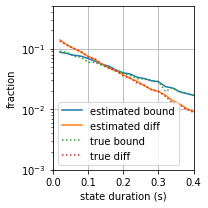

In [6]:
extrack.visualization.visualize_states_durations(all_tracks,
                                                 params = params,
                                                 dt = dt,
                                                 cell_dims = [1],
                                                 nb_states = 2,
                                                 max_nb_states = 200,
                                                 long_tracks = True,
                                                 nb_steps_lim = 20,
                                                 steps = False)

# ground truth histogram (actual labeling from simulations) :

seg_len_hists = extrack.histograms.ground_truth_hist(all_Bs, 2)
plt.plot(np.arange(1,len(seg_len_hists)+1)[:,None]*dt, seg_len_hists/np.sum(seg_len_hists,0), ':')
plt.legend(['estimated bound','estimated diff','true bound','true diff'])
# assesment of the slops of the histograms :

print('slop for state 0:', np.polyfit(np.arange(1,len(seg_len_hists))[3:15], np.log(seg_len_hists[3:15])[:,0], 1)[0])
print('slop for state 1:', np.polyfit(np.arange(1,len(seg_len_hists))[3:15], np.log(seg_len_hists[3:15])[:,1], 1)[0])

# we can notice the slops are not equal to the rates due to the fraction of tracks leavinf the field of view

In [47]:
# if someone wants to run an analysis with specific values, they can use the following function :

params = extrack.tracking.get_params(nb_states = 2,
                                     steady_state = False,
                                     vary_params = {'LocErr' : True, 'D0' : True, 'D1' : True, 'F0' : True, 'p01' : True, 'p10' : True, 'pBL' : True},
                                     estimated_vals = {'LocErr' : 0.025, 'D0' : 1e-20, 'D1' : 0.5, 'F0' : 0.45, 'p01' : 0.1, 'p10' : 0.1, 'pBL' : 0.1},
                                     min_values = {'LocErr' : 0.007, 'D0' : 1e-12, 'D1' : 0.00001, 'F0' : 0.001, 'p01' : 0.01, 'p10' : 0.01, 'pBL' : 0.01},
                                     max_values = {'LocErr' : 0.6, 'D0' : 1, 'D1' : 10, 'F0' : 0.999, 'p01' : 1., 'p10' : 1., 'pBL' : 0.99})

# can be addapted for more states by specifying all the relevant parameters.

ExTrack can also perform state preditions using the following function :

extrack.tracking.predict_Bs
arguments:
- all_tracks: dictionary describing the tracks with track length as keys (number of time positions, e.g. '23') of 3D arrays: dim 0 = track, dim 1 = time position, dim 2 = x, y position. This means 15 tracks of 7 time points in 2D will correspond to an array of shape [15,7,2].
- params: lmfit parameters used for the model.
- dt: time in between frames.
- cell_dims: dimension limits (um). estimated_vals, min_values, max_values should be changed accordingly to describe all states and transitions.
- nb_states: number of states. estimated_vals, min_values, max_values should be changed accordingly to describe all states and transitions.
- frame_len: number of frames for which the probability is perfectly computed. See method of the paper for more details.

outputs:
- pred_Bs: dict describing the state probability of each track for each time position with track length as keys (number of time positions, e.g. '23') of 3D arrays: dim 0 = track, dim 1 = time position, dim 2 = state.

In [78]:

# simulation of fiewer tracks to plot them and their annotation infered by ExTrack :

all_tracks, all_Bs = extrack.simulate_tracks.sim_FOV(nb_tracks=300,
                                                     max_track_len=60,
                                                     LocErr=0.02,
                                                     Ds = np.array([0,0.5]),
                                                     initial_fractions = np.array([0.6,0.4]),
                                                     TrMat = np.array([[0.9,0.1],[0.1,0.9]]),
                                                     dt = dt,
                                                     pBL = 0.1,
                                                     cell_dims = [1,], # dimension limits in x, y and z respectively
                                                     min_len = 5)

# performs the states probability predictions based on the most likely parameters :

pred_Bs = extrack.tracking.predict_Bs(all_tracks,
                                      dt = dt,
                                      params = params,
                                      cell_dims=[1],
                                      nb_states=2,
                                      frame_len=8)



number of tracks:
5 pos : 32, 6 pos : 31, 7 pos : 24, 8 pos : 20, 9 pos : 20, 10 pos : 21, 11 pos : 7, 12 pos : 15, 13 pos : 17, 14 pos : 7, 15 pos : 13, 16 pos : 4, 17 pos : 5, 18 pos : 3, 19 pos : 3, 20 pos : 1, 21 pos : 3, 22 pos : 2, 23 pos : 3, 24 pos : 2, 25 pos : 5, 26 pos : 1, 27 pos : 2, 28 pos : 4, 29 pos : 1, 32 pos : 1, 33 pos : 1, 37 pos : 1, 38 pos : 1, 42 pos : 1, 60 pos : 1, 

turn outputs from extrack to a more classical data frame format :

extrack.exporters.extrack_2_pandas
- all_tracks: dict describing the tracks with track length as keys (number of time positions, e.g. '23') of 3D arrays: dim 0 = track, dim 1 = time position, dim 2 = x, y position.
- pred_Bs: dict describing the state probability of each track for each time position with track length as keys (number of time positions, e.g. '23') of 3D arrays: dim 0 = track, dim 1 = time position, dim 2 = state.
- frames: dict describing the frame of each position of each track with keys track length (number of time positions, e.g. '23') of 2D arrays: dim 0 = track, dim 1 = time position, assumed to go from 0 to number of time positions - 1 if none.
- opt_metrics: dict of dicts for each specified optional metric to add to the dataframe. each array must be a 2D array of dims 0 = tracks, dim 1 = time position. e.g. {'QUALITY': {'5':np.array([...]), '6':np.array([...]), '7':np.array([...])}, 'SNR': {'5':np.array([...]), '6':np.array([...]), '7':np.array([...]) }}

outputs:
- DATA: pandas dataframe containing the necessary informations for each track

In [79]:

DATA = extrack.exporters.extrack_2_pandas(all_tracks, pred_Bs, frames = None, opt_metrics = {})


show all tracks on top of each other

extrack.visualization.visualize_tracks
arguments:
- DATA: dataframe outputed by extrack.exporters.extrack_2_pandas
- track_length_range: range of tracks ploted. plotting too many tracks may make it crash
- figsize: size of the figure plotted

.............

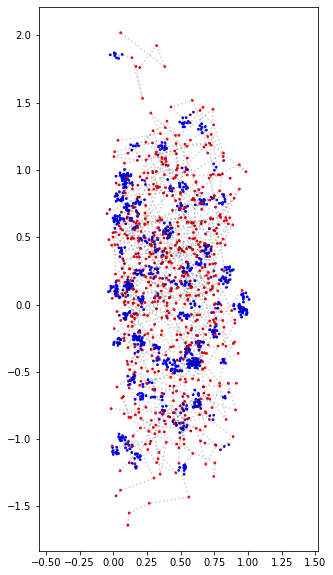

In [76]:
# show all tracks :

extrack.visualization.visualize_tracks(DATA,
                                       track_length_range = [10,np.inf],
                                       figsize = (5,10))

show the longest tracks in more details :
extrack.visualization.plot_tracks

arguments:
- DATA: dataframe outputed by extrack.exporters.extrack_2_pandas.
- max_track_length: maximum track length to be outputed, it will plot the longest tracks respecting this criteria.
- nb_subplots: number of lines and columns of subplots.
- figsize: size of the figure plotted

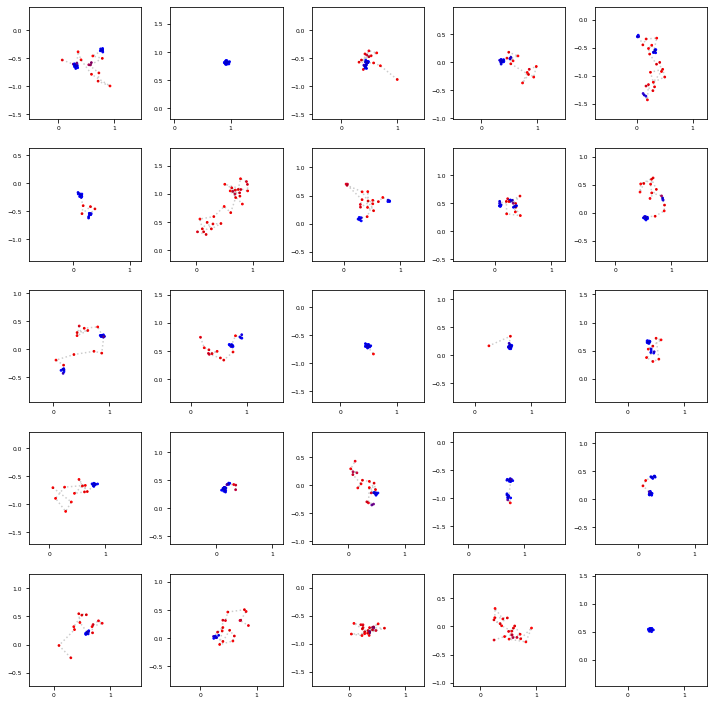

In [80]:
# show the longest tracks in more details :

extrack.visualization.plot_tracks(DATA,
                                  max_track_length = 50,
                                  nb_subplots = [5,5],
                                  figsize = (10,10), 
                                  lim = 1)

save tracks as either xml file used by trackmate or in a CSV file.
extrack.exporters.save_extrack_2_xml
arguments:
- all_tracks: dict describing the tracks with track length as keys (number of time positions, e.g. '23') of 3D arrays: dim 0 = track, dim 1 = time position, dim 2 = x, y position.
- pred_Bs: dict describing the state probability of each track for each time position with track length as keys (number of time positions, e.g. '23') of 3D arrays: dim 0 = track, dim 1 = time position, dim 2 = state.
- params: lmfit parameters
- path: path + name of the saved file
- dt: time in between frames.
- all_frames: dict describing the frame of each position of each track with keys track length (number of time positions, e.g. '23') of 2D arrays: dim 0 = track, dim 1 = time position, assumed to go from 0 to number of time positions - 1 if none.
- opt_metrics: dict of dicts for each specified optional metric to add to the dataframe. each array must be a 2D array of dims 0 = tracks, dim 1 = time position. e.g. {'QUALITY': {'5':np.array([...]), '6':np.array([...]), '7':np.array([...])}, 'SNR': {'5':np.array([...]), '6':np.array([...]), '7':np.array([...]) }}

In [62]:
# save as xml file used for trackmate :

save_path = './tracks.xml' 
extrack.exporters.save_extrack_2_xml(all_tracks,
                                     pred_Bs,
                                     params = params,
                                     path = save_path,
                                     dt = dt,
                                     all_frames = None,
                                     opt_metrics = {})

# save as csv file :
save_path = './tracks.csv' 
DATA.to_csv(save_path)
